In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dependent='Outcome'
independent=df.columns.drop('Outcome')
print(dependent)
print(list(independent))

Outcome
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.iloc[5:18]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df=df.drop_duplicates()

In [18]:
df.isnull().sum().sum()

np.int64(652)

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer=SimpleImputer(strategy='mean')
df[cols_with_missing]=imputer.fit_transform(df[cols_with_missing])

In [21]:
df.isnull().sum().sum()

np.int64(0)

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [24]:
df.iloc[10][:-1].mean()

np.float64(57.31158036794993)

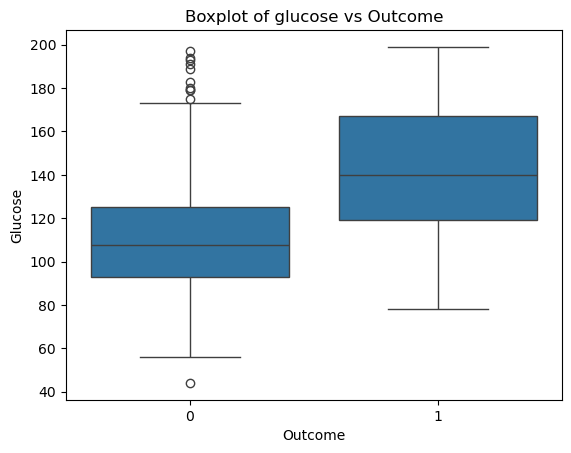

In [25]:
sns.boxplot(x='Outcome',y='Glucose',data=df)
plt.title('Boxplot of glucose vs Outcome')
plt.show()

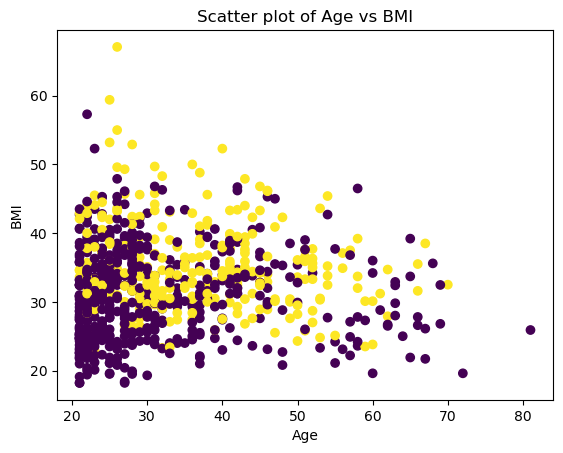

In [28]:
plt.scatter(df['Age'],df['BMI'],c=df['Outcome'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter plot of Age vs BMI')
plt.show()

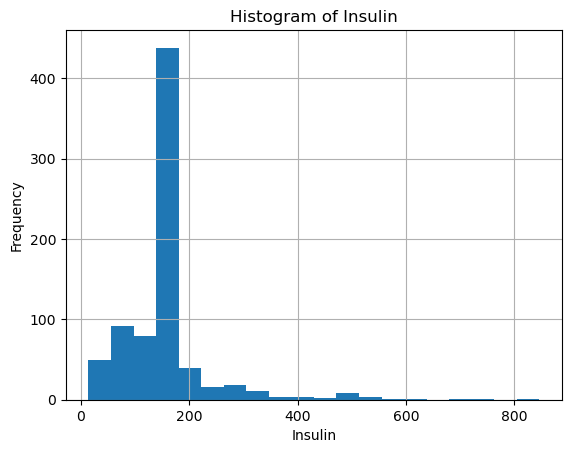

In [29]:
df['Insulin'].hist(bins=20)
plt.title("Histogram of Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

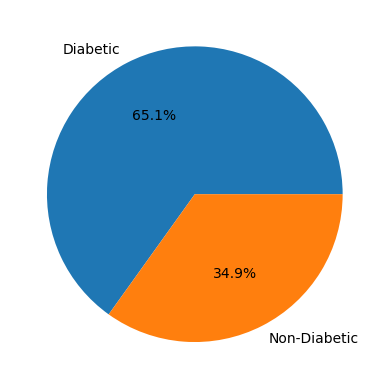

In [31]:
labels=['Diabetic','Non-Diabetic']
sizes=df['Outcome'].value_counts()
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5292\3613520029.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'],shade=True)


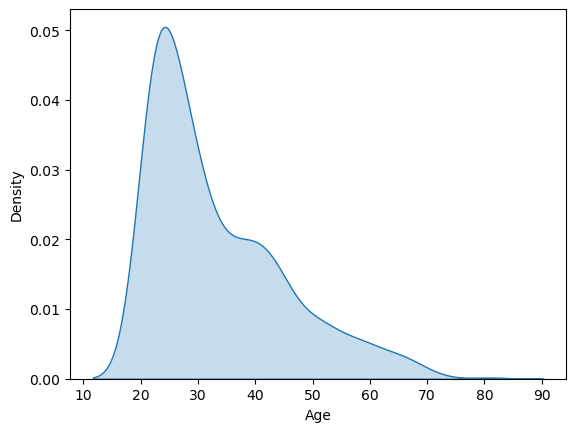

In [32]:
sns.kdeplot(df['Age'],shade=True)
plt.show()

In [33]:
df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Obese
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obese


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [38]:
df['BMI_LabelEncoded']=le.fit_transform(df['BMI_Category'].astype(str))

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,BMI_LabelEncoded
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight,2
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal,0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight,2
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Obese,1
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obese,1
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight,2
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obese,1


In [41]:
df=pd.get_dummies(df,columns=['BMI_Category'],drop_first=True)

In [42]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_LabelEncoded,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,1,False,False,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,2,False,True,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0,True,False,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,2,False,True,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,1,False,False,True
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,1,False,False,True
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,2,False,True,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,1,False,False,True


In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_LabelEncoded',
       'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese'],
      dtype='object')

In [51]:
# Safely drop label encoded column
if 'BMI_LabelEncoded' in df.columns:
    df.drop('BMI_LabelEncoded', axis=1, inplace=True)

# Safely drop one-hot encoded columns
one_hot_cols = [col for col in df.columns if col.startswith('BMI_Category_')]
if one_hot_cols:
    df.drop(columns=one_hot_cols, inplace=True)

# Safely drop original BMI_Category (if still exists)
if 'BMI_Category' in df.columns:
    df.drop('BMI_Category', axis=1, inplace=True)

# Check remaining columns
print("\n✅ Columns after safe drop:\n", df.columns)



✅ Columns after safe drop:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [52]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [53]:
corr_matrix=df.corr()


In [54]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<Axes: >

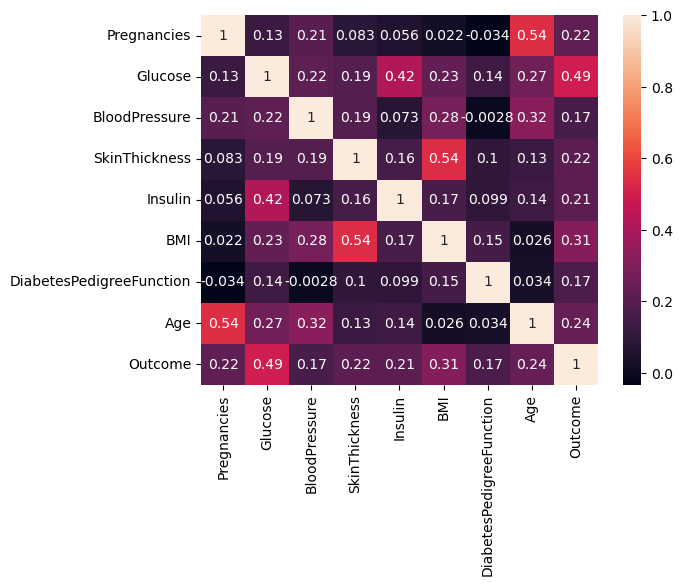

In [56]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Outcome', ylabel='Glucose'>

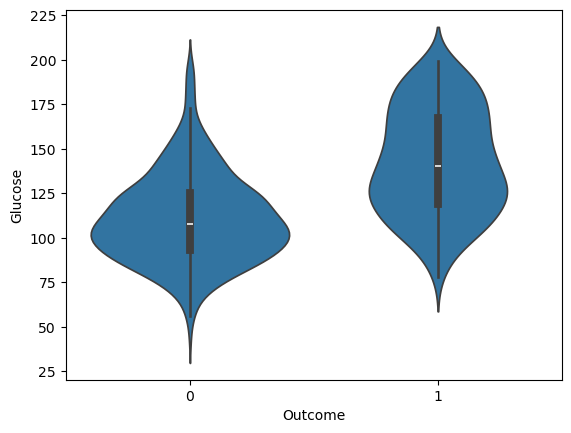

In [57]:
sns.violinplot(x='Outcome',y='Glucose',data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

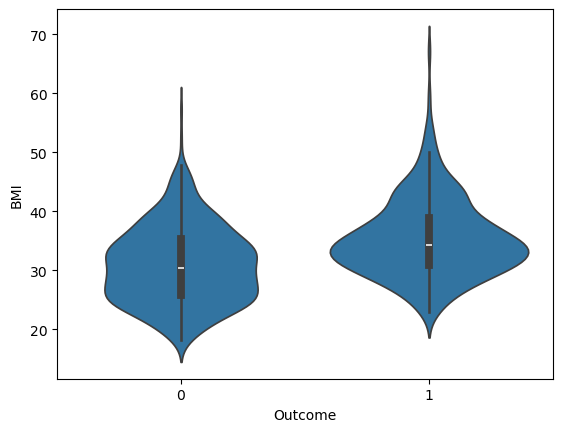

In [58]:
sns.violinplot(x='Outcome',y='BMI',data=df)

In [59]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [60]:
from sklearn.preprocessing import MinMaxScaler
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [61]:
scaler=MinMaxScaler()

In [68]:
X_scaled=scaler.fit_transform(x)

In [69]:
X_scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [72]:
knn=KNeighborsClassifier(n_neighbors=5)

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
knn_preds=knn.predict(X_test)

In [78]:
knn_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [79]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [80]:
nb_preds=nb.predict(X_test)

In [81]:
nb_preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [82]:
mb=MultinomialNB()
mb.fit(X_train,y_train)

MultinomialNB()

In [83]:
mb_preds=mb.predict(X_test)

In [84]:
mb_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
bb=BernoulliNB()
bb.fit(X_train,y_train)

BernoulliNB()

In [86]:
bb_preds=bb.predict(X_test)

In [87]:
bb_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model("KNN", y_test, knn_preds))
results.append(evaluate_model("Naive Bayes", y_test, nb_preds))

# Create comparison table
results_df = pd.DataFrame(results)
print("\n🔍 Model Comparison Table:")
print(results_df)


🔍 Model Comparison Table:
         Model  Accuracy  Precision    Recall  F1 Score
0          KNN  0.753247   0.654545  0.654545  0.654545
1  Naive Bayes  0.746753   0.637931  0.672727  0.654867


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [91]:
model=RandomForestClassifier(random_state=42)

In [92]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [94]:
y_pred=model.predict(X_test)

In [95]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [100]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [102]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)

In [103]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [105]:
y_pred = model.predict(X_test)

In [106]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154



In [109]:
from sklearn.model_selection import KFold,cross_val_score

In [114]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(model,x,y,cv=kfold)
print(scores)
print(scores.mean())

[0.72727273 0.75974026 0.74025974 0.80392157 0.73856209]
0.7539512774806892


In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
dt=DecisionTreeClassifier(random_state=42)

In [127]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features': [None, 'sqrt', 'log2']
}

In [128]:
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

In [129]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [130]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [131]:
best_dt=grid_search.best_estimator_

In [133]:
y_pred=best_dt.predict(X_test)

In [134]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154

